# Homework5: Wasserstein GANs and GAN evaluation

In [1]:
%matplotlib inline

## Task 1: Theory (3pt)

### Problem 1: Conjugate functions / f-GAN (1pt)

We have discussed the framework for f-divergence minimization at Lecture 9. There we have got the variational inequality for f-divergence using Fenchel conjugate function:
$$
    D_f(\pi || p) \geq \sup_{T \in \mathcal{T}} \left[\mathbb{E}_{\pi}T(\mathbf{x}) -  \mathbb{E}_p f^*(T(\mathbf{x})) \right].
$$
Here
$$
	f^*(t) = \sup_{u \in \text{dom}_f} \left( ut - f(u) \right), \quad f(u) = \sup_{t \in \text{dom}_{f^*}} \left( ut - f^*(t) \right).
$$

In this task you have to derive standard GAN objective from the variational inequality.

Let define function $f(u) = u \log u - (u + 1) \log (u + 1)$.

- Find $\text{dom}(f^*)$.
- Show that $f^*(t) = - \log (1 - e^t)$.
- Use reparametrization $T(\mathbf{x}) = \log D(\mathbf{x})$ to get the standard GAN objective (note that $D(\mathbf{x}) \in [0, 1]$, explain why this reparametrization is correct).


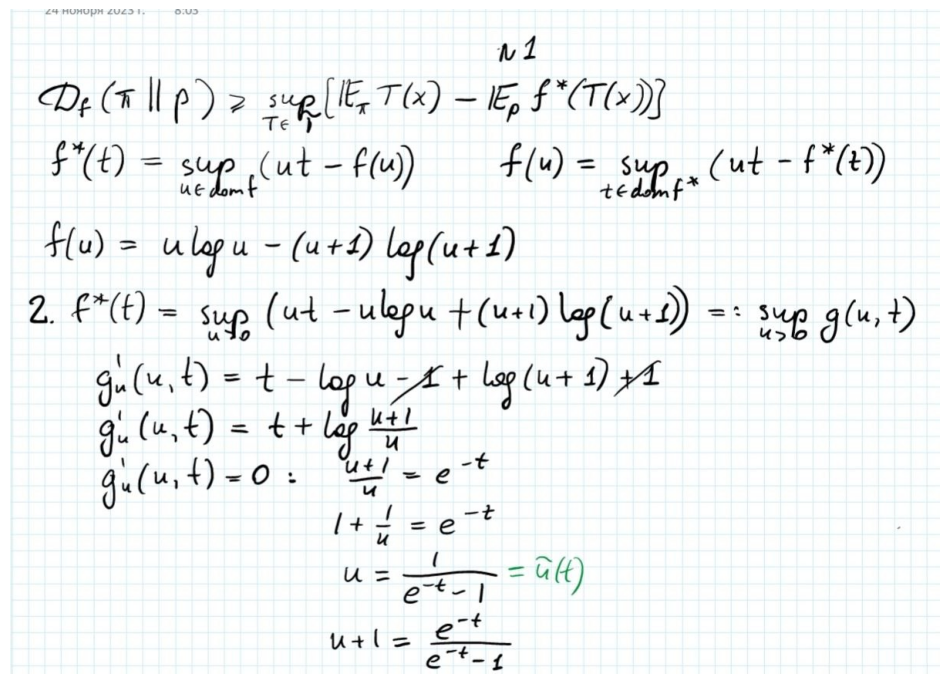

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-5-1-1.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

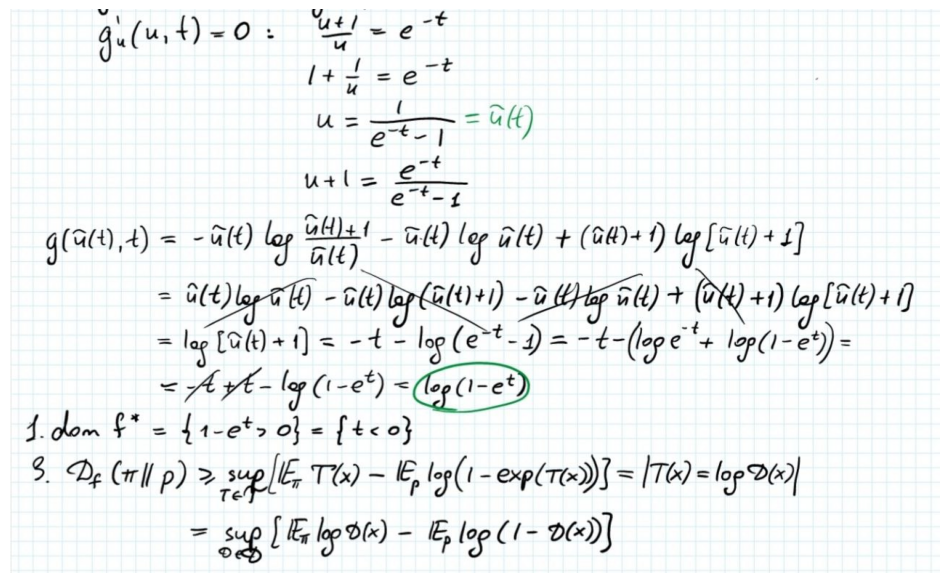

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-5-1-2.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

### Problem 1: Neural ODE vs backprop (2pt)

At Lecture 10 we have discussed [Neural ODE](https://arxiv.org/pdf/1806.07366.pdf) model. There we used the adjoint state functions
$$
	\mathbf{a}_{\mathbf{z}}(t) = \frac{\partial L(\mathbf{y})}{\partial \mathbf{z}(t)}; \quad \mathbf{a}_{\boldsymbol{\theta}}(t) = \frac{\partial L(\mathbf{y})}{\partial \boldsymbol{\theta}(t)}.
$$

These two functions allowed to derive continuous version of backpropagation algorithm.

The formulas for the method are given by Pontryagin theorem. It claims that
$$
	\frac{d \mathbf{a}_{\mathbf{z}}(t)}{dt} = - \mathbf{a}_{\mathbf{z}}(t)^T \cdot \frac{\partial f_{\boldsymbol{\theta}}(\mathbf{z}(t), t)}{\partial \mathbf{z}}
$$

$$
    \frac{d \mathbf{a}_{\boldsymbol{\theta}}(t)}{dt} = - \mathbf{a}_{\mathbf{z}}(t)^T \cdot \frac{\partial f_{\boldsymbol{\theta}}(\mathbf{z}(t), t)}{\partial \boldsymbol{\theta}}.
$$

Your task here is to prove the first formula for $\frac{d \mathbf{a}_{\mathbf{z}}(t)}{dt}$.

**Hints**: you have to use 3 facts

1. Notion of the limit:
$$
    \frac{d \mathbf{a}_{\mathbf{z}}(t)}{dt} = \lim_{\varepsilon \rightarrow +0} \frac{\mathbf{a}_{\mathbf{z}}(t + \varepsilon) - \mathbf{a}_{\mathbf{z}}(t)}{\varepsilon}.
$$

2. Chain rule:
$$
    \frac{\partial L(\mathbf{y})}{\partial \mathbf{z}(t)} = \frac{\partial L(\mathbf{y})}{\partial \mathbf{z}(t + \varepsilon)} \cdot \frac{\mathbf{z}(t + \varepsilon)}{\partial \mathbf{z}(t)}.
$$
3. Tailor series for
$$
    \mathbf{z}(t + \varepsilon) = \int_{t}^{t + \varepsilon} f_{\boldsymbol{\theta}}(\mathbf{z}(t), t) d t + \mathbf{z}(t).
$$

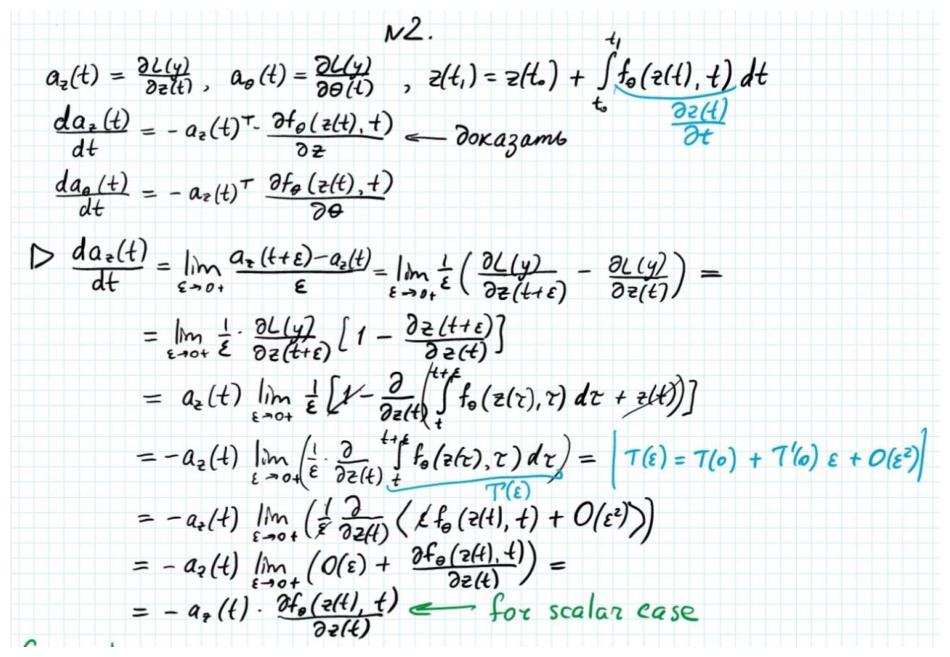

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-5-2-1.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

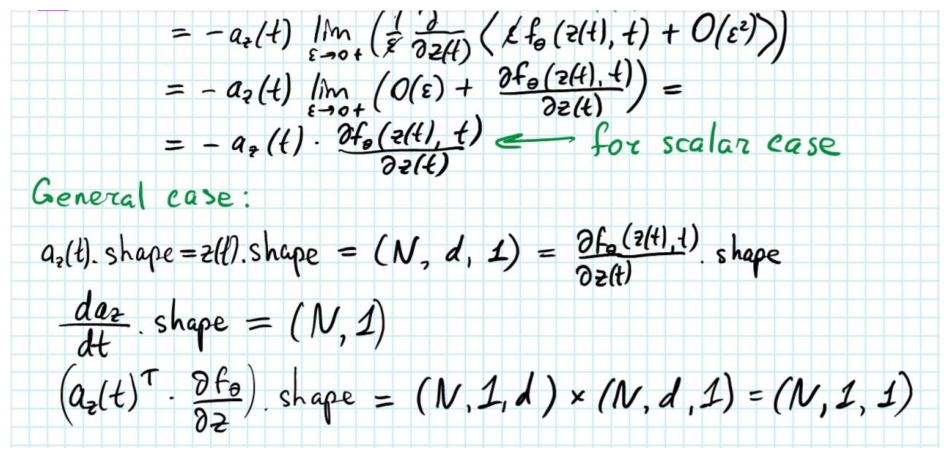

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread("task-5-2-2.jpg")
plt.figure(figsize=(12, 10))
plt.imshow(image)
plt.axis(False)
plt.show()

In [1]:
!pip install --upgrade --no-cache-dir gdown

REPO_NAME = "2023-DGM-MIPT-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!mv ./{REPO_NAME}/homeworks/stylegan.py ./stylegan.py
!mv ./{REPO_NAME}/homeworks/inception.py ./inception.py
!rm -Rf {REPO_NAME}

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Cloning into '2023-DGM-MIPT-course'...
remote: Enumerating objects: 958, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 958 (delta 87), reused 116 (delta 83), pack-reused 835
Receiving objects: 100% (958/958), 329.45 MiB | 26.36 MiB/s, done.
Resolving deltas: 100% (370/370), done.
Updating files: 100% (340/340), done.
Processing ./2023-DGM-MIPT-course/homeworks
  Preparing metadata (setup.py) ... done
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=4122 sha256=26e5d9d75427031e1fbf2b9d4680ea9fcd759a27e6c939ef3b4de3fa46498297
  Stored in directory: /tmp/pip-ephem-wheel-cache-0o08lu19/wheels/d7/24/b0/17b69ee697654689a9a78e4d6d52c72d6c09e07ac2e47017ad
Successfully built dgm-utils


In [2]:
from dgm_utils import train_model, show_samples, plot_training_curves
from dgm_utils import visualize_images, load_dataset

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from tqdm.notebook import tqdm
from typing import Optional

import scipy
from scipy.stats import entropy

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.nn import functional as F
from inception import InceptionV3

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False


def reset_seed():
    OUTPUT_SEED = 0xBADBEEF
    torch.manual_seed(OUTPUT_SEED)
    np.random.seed(OUTPUT_SEED)


USE_CUDA = torch.cuda.is_available()

print("cuda is available:", USE_CUDA)

cuda is available: True


In [4]:
from dgm_utils import show_samples, plot_training_curves
from dgm_utils import visualize_images, load_dataset

In [5]:
# do not change this function
def plot_losses(losses: np.ndarray, title: str):
    n_itr = len(losses)
    xs = np.arange(n_itr)

    plt.figure(figsize=(7, 5))
    plt.plot(xs, losses)
    plt.title(title, fontsize=14)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Loss", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Task 2: Wasserstein GANs for CIFAR 10 (5pt)

In this task you will fit different kinds of Wasserstein GANs (different ways to enforce Lipschitzness) that we discussed in the Lecture 8 to the CIFAR10 dataset
* [WGAN](https://arxiv.org/abs/1701.07875) - standard Wasserstein GAN with weight clipping;
* [WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf) - Wasserstein GAN with Gradient Penalty;
* [SN-GAN](https://arxiv.org/pdf/1802.05957.pdf) - Wasserstein GAN with Spectral Normalization.

100%|██████████| 170498071/170498071 [00:04<00:00, 34338032.55it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


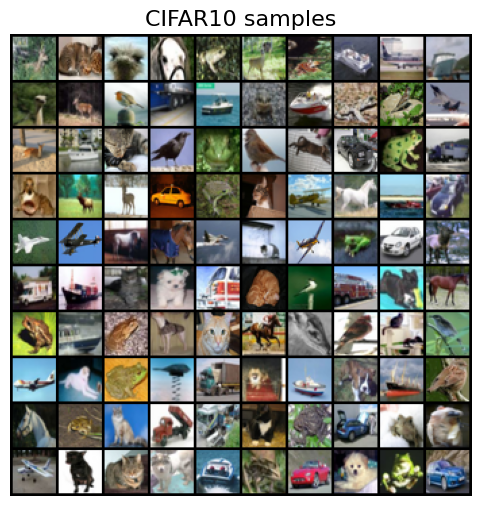

In [6]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

### Problem 1: WGAN (2pt)

[WGAN](https://arxiv.org/abs/1701.07875) model uses weight clipping to enforce Lipschitzness of the critic.

The model objective is
$$
\min_{G} W(\pi || p) \approx \min_{G} \max_{\boldsymbol{\phi} \in \boldsymbol{\Phi}} \left[ \mathbb{E}_{\pi(\mathbf{x})} f_{\boldsymbol{\phi}}(\mathbf{x})  - \mathbb{E}_{p(\mathbf{z})} f_{\boldsymbol{\phi}}(G_{\boldsymbol{\theta}}(\mathbf{z}))\right].
$$
Here $f_{\boldsymbol{\phi}}(\mathbf{x})$ is the critic model. The critic weights $\boldsymbol{\phi}$ should lie in the compact set $\boldsymbol{\Phi} = [-c, c]^d$.

In this task we will use fully-connected networks for the generator $G_{\boldsymbol{\theta}}(\mathbf{z})$ and the critic $f_{\boldsymbol{\phi}}(\mathbf{x})$.

Here we will use convolution-based generator and critic.

First of all, let define generator network. It will be the same for all WGAN models.

In [7]:
class ConvGenerator(nn.Module):
    def __init__(self, input_size: int = 128, n_channels: int = 64) -> None:
        super().__init__()
        self.n_channels = n_channels
        self.input_size = input_size
        # ====
        # 1) define linear layer with output units 4 * 4 * 4 * n_channels, then relu
        # 2) define transposed conv with stride 2, kernel size 2 then BN, then relu
        # 3) define transposed conv with stride 2, kernel size 2

        # ====
        self.linear = nn.Linear(input_size, 4 * 4 * 4 * n_channels)
        self.transposed_conv1 = nn.Sequential(
            nn.ConvTranspose2d(4 * n_channels, 2 * n_channels, kernel_size=2, stride=2),
            nn.BatchNorm2d(2 * n_channels),
            nn.ReLU(inplace=True)
        )
        self.transposed_conv2 = nn.Sequential(
            nn.ConvTranspose2d(2 * n_channels, n_channels, kernel_size=2, stride=2),
            nn.BatchNorm2d(n_channels),
            nn.ReLU(inplace=True)
        )
        self.transposed_conv3 = nn.ConvTranspose2d(n_channels, 3, kernel_size=2, stride=2)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        x = F.relu(self.linear(input))  # Pass through linear layer and ReLU
        x = x.view(-1, 4 * self.n_channels, 4, 4)  # Reshape

        x = self.transposed_conv2(self.transposed_conv1(x))  # Apply transposed convolution 1
        output = self.transposed_conv3(x)  # Apply transposed convolution 2

        return output.view(-1, 3, 32, 32)

    def sample(self, n_samples: int) -> torch.Tensor:
        noise = torch.randn(n_samples, self.input_size, device=self.linear.weight.device)
        noisy_samples = self.forward(noise)
        return noisy_samples

Now it is time to define our critic. Here we will use the same class for all WGAN models, but the arguments will depend on the WGAN mode.

In [8]:
class ConvCritic(nn.Module):
    def __init__(
        self,
        n_channels: int,
        conv_layer: Optional[object] = None,
        linear_layer: Optional[object] = None,
        clip_c: Optional[float] = None,
    ) -> None:
        super().__init__()
        self.n_channels = n_channels
        self.conv_layer = conv_layer or nn.Conv2d
        self.linear_layer = linear_layer or nn.Linear
        self.clip_c = clip_c

        self.conv_sequence = nn.Sequential(
            self.conv_layer(3, n_channels, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            self.conv_layer(n_channels, n_channels * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(n_channels * 2),
            nn.LeakyReLU(0.2, inplace=True),
        )

        self.fc = self.linear_layer(n_channels * 2 * 8 * 8, 1)

    def clip_weights(self) -> None:
        for param in self.parameters():
            param.data.clamp_(-self.clip_c, self.clip_c)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        if self.clip_c is not None:
            self.clip_weights()

        x = self.conv_sequence(x)
        x = x.view(x.size(0), -1)  # Reshape
        output = self.fc(x)

        return output

In [19]:
def train_wgan(
    generator: object,
    critic: object,
    train_loader: object,
    critic_steps: int,
    batch_size: int,
    n_epochs: int,
    lr: float,
    use_cuda: bool = False,
    gp_weight: Optional[float] = None,
) -> dict:

    if use_cuda:
        critic = critic.cuda()
        generator = generator.cuda()
    critic.train()
    generator.train()

    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0, 0.9))
    critic_optimizer = torch.optim.Adam(critic.parameters(), lr=lr, betas=(0, 0.9))

    curr_iter = 0
    batch_loss_history = {"discriminator_losses": [], "generator_losses": []}

    for epoch_i in tqdm(range(n_epochs)):
        for batch_i, real_data in enumerate(train_loader):  # Retrieve batches from train_loader
            curr_iter += 1
            if use_cuda:
                real_data = real_data.cuda()

            # do a critic update
            critic_optimizer.zero_grad()
            fake_data = generator.sample(batch_size).detach()

            critic_fake = critic(fake_data)
            critic_real = critic(real_data)

            d_loss = -(torch.mean(critic_real) - torch.mean(critic_fake))

            if gp_weight is not None:
                gp = gradient_penalty(critic, real_data, fake_data)
                d_loss += gp_weight * gp

            d_loss.backward()
            critic_optimizer.step()

            # generator update
            if curr_iter % critic_steps == 0:
                gen_optimizer.zero_grad()
                fake_data = generator.sample(batch_size)
                critic_fake = critic(fake_data)

                g_loss = -torch.mean(critic_fake)

                g_loss.backward()
                gen_optimizer.step()

                batch_loss_history["generator_losses"].append(g_loss.item())
                batch_loss_history["discriminator_losses"].append(d_loss.item())

    return batch_loss_history

  0%|          | 0/35 [00:00<?, ?it/s]

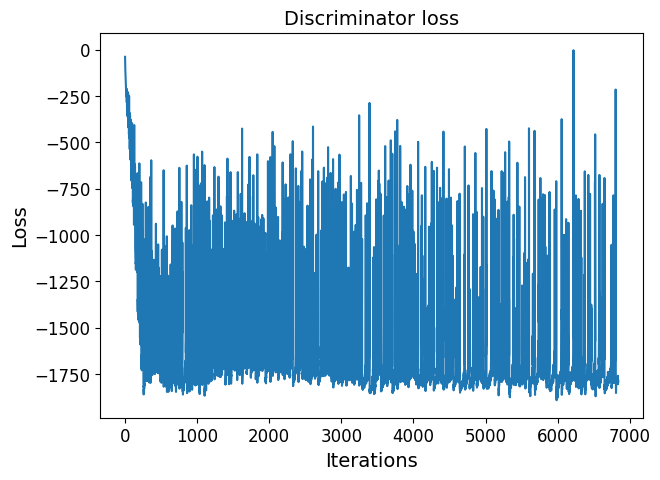

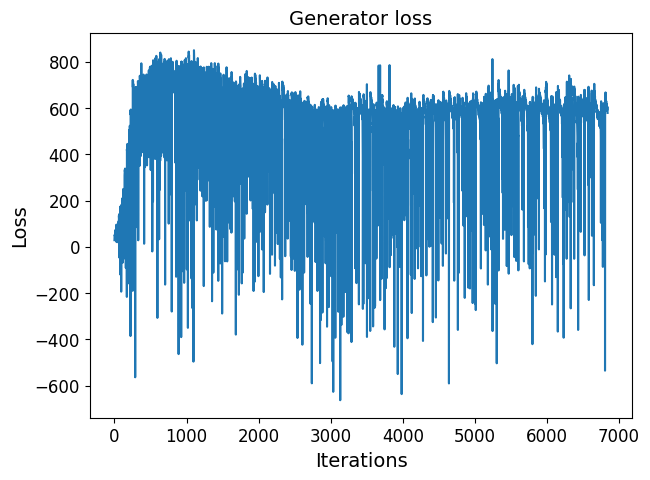

In [15]:
# ====
# choose these parameters (you have to train the model more than 20 epochs to get good results)
BATCH_SIZE = 64    # any adequate value
N_CHANNELS = 64   # > 32
N_EPOCHS = 35      # > 10
CRITIC_STEPS = 4  # > 2
CLIP_C = 0.5        # < 1
LR = 5e-4            # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS, clip_c=CLIP_C)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

Let sample from our model and draw the samples.

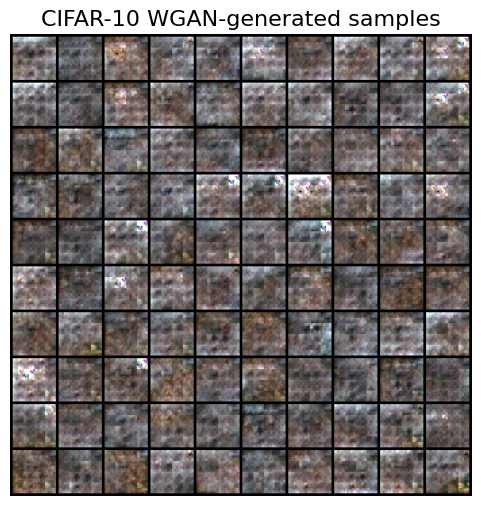

In [16]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()


show_samples(samples[:100], title="CIFAR-10 WGAN-generated samples")

### Problem 2: WGAN-GP for CIFAR 10 (1pt)

[WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf)  model uses gradient penalty to enforce Lipschitzness.

The model objective is
$$
    W(\pi || p) = \underbrace{\mathbb{E}_{\pi(\mathbf{x})} f_{\boldsymbol{\phi}}(\mathbf{x})  - \mathbb{E}_{p(\mathbf{x} | \boldsymbol{\theta})} f_{\boldsymbol{\phi}}(\mathbf{x})}_{\text{original critic loss}} + \lambda \underbrace{\mathbb{E}_{U[0, 1]} \left[ \left( \| \nabla_{\hat{\mathbf{x}}} f_{\boldsymbol{\phi}}(\hat{\mathbf{x}}) \|_2 - 1 \right) ^ 2\right]}_{\text{gradient penalty}},
$$
where the samples $\hat{\mathbf{x}}_t = t \mathbf{x} + (1 - t) \mathbf{y}$ with $t \in [0, 1]$ are uniformly sampled along straight lines between pairs of points: $\mathbf{x}$ from the data distribution $\pi(\mathbf{x})$ and $\mathbf{y}$ from the generator distribution $p(\mathbf{x} | \boldsymbol{\theta}))$.

Let define our gradient penalty loss.

In [25]:
def gradient_penalty(
    critic: object, real_data: torch.Tensor, fake_data: torch.Tensor
) -> torch.Tensor:
    # ====
    # Calculate interpolation x_t = t * x_real + (1 - t) x_fake
    # 1) sample t
    # 2) create x_t (be careful about shapes)
    # 3) apply critic to x_t
    # ====
    batch_size = real_data.shape[0]
    t_shape = np.ones_like(real_data.shape)
    t_shape[0] = batch_size

    t = torch.rand(*t_shape, device=real_data.device)
    x_t = (t * real_data + (1 - t) * fake_data).detach()
    x_t.requires_grad = True

    d_output = critic(x_t)

    gradients = torch.autograd.grad(
        outputs=d_output,
        inputs=x_t,
        grad_outputs=torch.ones_like(d_output).to(real_data.device),
        create_graph=True,
        retain_graph=True,
    )[0]

    gradients = gradients.view(batch_size, -1)
    gradients_norm = torch.sqrt(torch.sum(gradients ** 2, dim=1))

    penalty = ((gradients_norm - 1) ** 2).mean()
    return penalty


def test_gradient_penalty():
    x = np.random.normal(size=(10, 4))
    x_norm = np.mean(np.sqrt(x**2))
    x = torch.randn(size=(10, 4))
    x.requires_grad = True
    assert gradient_penalty(lambda x: x, x, x).numpy() == 1
    assert gradient_penalty(lambda x: x * 0, x, x).numpy() == 1


test_gradient_penalty()

That is all :)

We will use the same `ConvGenerator`, `ConvCritic` and `train_wgan()` as for WGAN model here.

  0%|          | 0/40 [00:00<?, ?it/s]

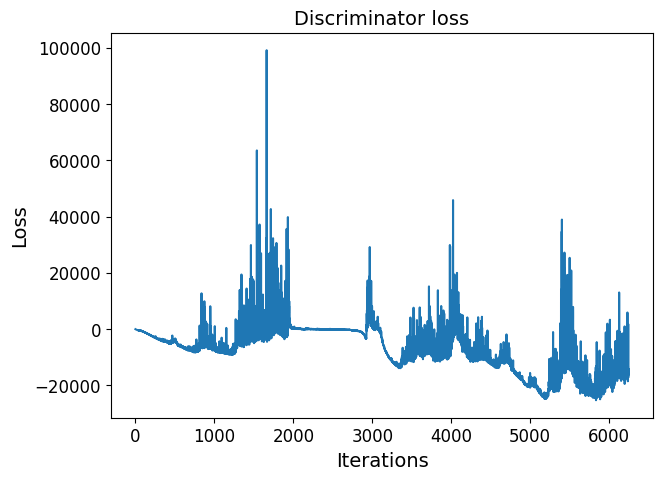

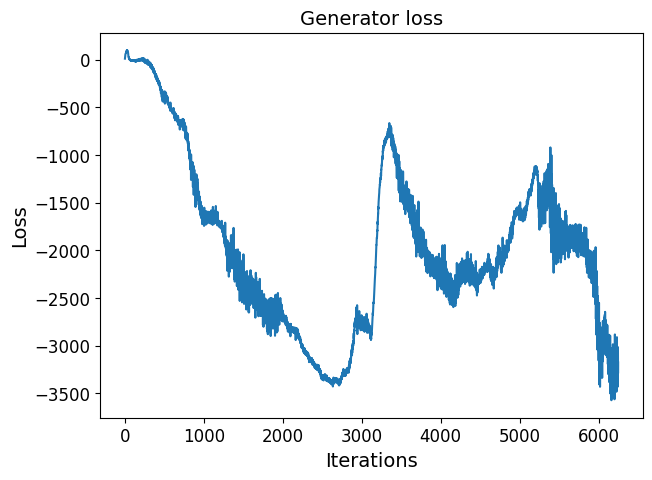

In [26]:
# ====
# your code
# choose these parameters (you have to train the model more than 20 epochs to get good results)
BATCH_SIZE = 64    # any adequate value
N_CHANNELS = 64    # > 32
N_EPOCHS = 40      # > 10
CRITIC_STEPS = 5  # > 2
GP_WEIGHT = 10     # > 5
LR = 5e-4            # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    gp_weight=GP_WEIGHT,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

Let sample from our model and draw the samples.

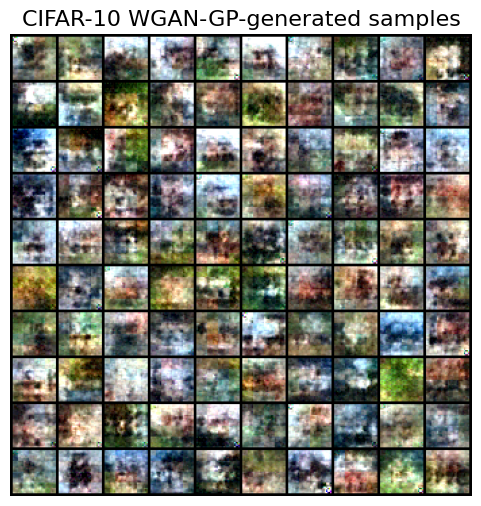

In [31]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()


show_samples(samples[:100], title="CIFAR-10 WGAN-GP-generated samples")

### Problem 3: SN-GAN on CIFAR10 (2pt)

[Spectral Normalization GAN](https://arxiv.org/pdf/1802.05957.pdf) replaces the weights in the critic $f_{\boldsymbol{\phi}}(\mathbf{x})$ by
$$
    \mathbf{W}^{SN} = \frac{\mathbf{W}}{\|\mathbf{W}\|_2}.
$$

This ensures that $\| f\|_L \leq 1.$.

Power iteration method allows to efficiently compute $\| \mathbf{W} \|_2 = \sqrt{\lambda_{\text{max}}(\mathbf{W}^T \mathbf{W})}$.
    
The pseudocode of the method is:
* $\mathbf{u}_0$ -- random vector.
* for $k = 0, \dots, n - 1$:
$$
    \mathbf{v}_{k+1} = \frac{\mathbf{W}^T \mathbf{u}_{k}}{\| \mathbf{W}^T \mathbf{u}_{k} \|}, \quad \mathbf{u}_{k+1} = \frac{\mathbf{W} \mathbf{v}_{k+1}}{\| \mathbf{W} \mathbf{v}_{k+1} \|}.
$$
* approximate the spectral norm
$$
    \| \mathbf{W} \|_2 = \sqrt{\lambda_{\text{max}}(\mathbf{W}^T \mathbf{W})} \approx \mathbf{u}_{n}^T \mathbf{W} \mathbf{v}_{n}.
$$

First step is to implement this method.

In [28]:
def power_iteration_method(
    W: torch.Tensor,
    n_iters: int,
    u_init: Optional[nn.Parameter] = None,
    v_init: Optional[nn.Parameter] = None,
) -> tuple:
    if u_init is None:
        u_init = nn.Parameter(torch.randn(W.shape[0]), requires_grad=False)
    if v_init is None:
        v_init = nn.Parameter(torch.randn(W.shape[1]), requires_grad=False)

    # ====
    # 1) implement for loop and update v_init/u_init
    # 2) calculate spectral norm
    # 3) return spectral norm (sigma) and the last values for v_init, u_init

    # ====
    u = u_init
    v = v_init

    for _ in range(n_iters):
        v = torch.matmul(W.mT, u)
        v = v / torch.norm(v)

        u = torch.matmul(W, v)
        u = u / torch.norm(u)

    sigma = torch.dot(u, torch.matmul(W, v))

    return sigma, u, v


def test_power_iteration_method():
    W = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]], dtype=np.float32)
    U, S, V = np.linalg.svd(W)
    W_tensor = torch.tensor(W)
    sigma, u, v = power_iteration_method(W_tensor, n_iters=10)
    np.allclose(S[0], sigma)
    np.allclose(u, U[:, 0])
    np.allclose(v, V[0, :])


test_power_iteration_method()

Now we need to define layers with Spectral Normalization (we will use `SpectralNormConv2D` and `SpectralNormLinear` layers instead of standard `nn.Conv2D` and `nn.Linear` in our critic).

In [29]:
class SpectralNormConv2D(nn.Conv2d):
    def __init__(self, *args, **kwargs):
        self.power_iterations = kwargs.pop("power_iterations")
        super().__init__(*args, **kwargs)
        self.u = nn.Parameter(torch.randn(self.weight.shape[0]), requires_grad=False)
        self.v = nn.Parameter(torch.randn(self.weight.shape[1]), requires_grad=False)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        W = self.weight.view(self.weight.shape[0], -1)
        with torch.no_grad():
            sigma, u, v = power_iteration_method(W, self.power_iterations, self.u, self.v)

        self.u.data = u.data
        self.v.data = v.data
        self.weight.data = self.weight.data / sigma

        return super().forward(input)


class SpectralNormLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        self.power_iterations = kwargs.pop("power_iterations")
        super().__init__(*args, **kwargs)

        self.u = nn.Parameter(torch.randn(self.weight.shape[0]), requires_grad=False)
        self.v = nn.Parameter(torch.randn(self.weight.shape[1]), requires_grad=False)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        W = self.weight.view(self.weight.shape[0], -1)
        with torch.no_grad():
            sigma, u, v = power_iteration_method(W, self.power_iterations, self.u, self.v)

        self.u.data = u.data
        self.v.data = v.data
        self.weight.data = self.weight.data / sigma

        return super().forward(input)

That is all :)

We will use the same `ConvGenerator`, `ConvCritic` and `train_wgan()` as for WGAN model here.

Total number of epochs: 50


  0%|          | 0/50 [00:00<?, ?it/s]

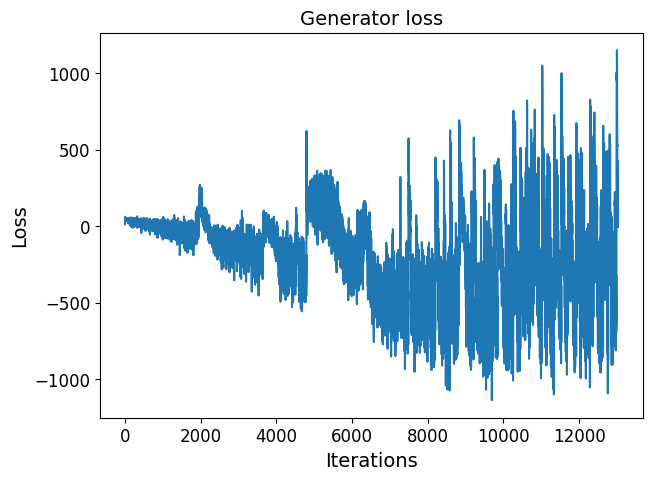

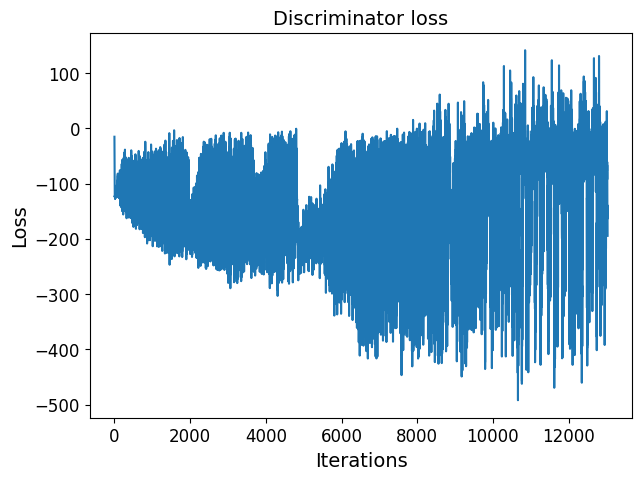

In [30]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 64        # any adequate value
DIM = 128               # > 32
N_EPOCHS = 50          # > 20
CRITIC_STEPS = 3      # 1 < x < 10
POWER_ITERATIONS = 4  # 1 < x < 5
LR = 5e-4                # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
print("Total number of epochs:", N_EPOCHS)

generator = ConvGenerator(n_channels=DIM)
conv_layer = partial(SpectralNormConv2D, power_iterations=POWER_ITERATIONS)
linear_layer = partial(SpectralNormLinear, power_iterations=POWER_ITERATIONS)
critic = ConvCritic(n_channels=DIM, conv_layer=conv_layer, linear_layer=linear_layer)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA,
)

g_losses = train_losses["generator_losses"]
d_losses = train_losses["discriminator_losses"]

plot_losses(g_losses, "Generator loss")
plot_losses(d_losses, "Discriminator loss")

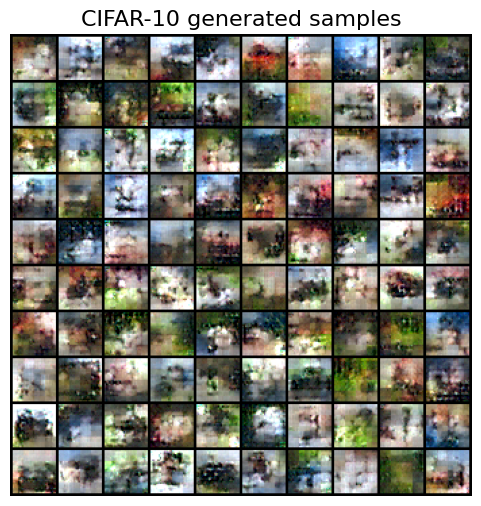

In [ ]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()


show_samples(samples[:100], title="CIFAR-10 generated samples")

You are really welcome to experiment with combination of three approaches to get best samples :)

## Task 3: Inception Score and FID (5pt)

Here our goal is to understand how to evaluate likelihood-free models using [Inception Score](https://arxiv.org/pdf/1606.03498.pdf) and [Frechet Inception Distance](https://arxiv.org/pdf/1706.08500.pdf).

In [ ]:
# this is a helper function that we will use further
def resize_tensor(x: torch.Tensor, image_size: int) -> torch.Tensor:
    return F.interpolate(
        x, size=(image_size, image_size), mode="bilinear", align_corners=False
    )

Your task is to implement the *Inception score* and *FID* score and estimate the quality of two trained *StyleGAN* models we have discussed on Seminar 9 and Seminar 10:

1. `stylegan_wgangp` is a *StyleGAN* model trained with *WGAN-GP* loss on CIFAR10 dataset ([ckpt_link](https://drive.google.com/file/d/1bTDbmleLXowuGcahsoSBeihSVbGgW52X/view?usp=sharing))

2. `stylegan_r1` is a *StyleGAN* model trained with standard gan loss with $R_1$ regularization on CIFAR10 dataset ([ckpt_link](https://drive.google.com/file/d/1PNeESbetxazQkBJbBnoizyWgGKJwfpW5/view?usp=sharing))

In [ ]:
# loading models checkpoints
!gdown --id 1bTDbmleLXowuGcahsoSBeihSVbGgW52X
!gdown --id 1PNeESbetxazQkBJbBnoizyWgGKJwfpW5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bTDbmleLXowuGcahsoSBeihSVbGgW52X
To: /content/stylegan_wgangp_loss_FINAL.pth
100% 1.36M/1.36M [00:00<00:00, 167MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PNeESbetxazQkBJbBnoizyWgGKJwfpW5
To: /content/stylegan_gan_r1_loss_FINAL.pth
100% 1.36M/1.36M [00:00<00:00, 169MB/s]


In [ ]:
from stylegan import MicroStyleGANGenerator
from copy import deepcopy

sg_wgangp_name = "stylegan_wgangp_loss_FINAL.pth"
sg_gan_r1_name = "stylegan_gan_r1_loss_FINAL.pth"


stylegan_wgangp = MicroStyleGANGenerator(
    z_dim=128,
    map_hidden_dim=256,
    w_dim=64,
    in_chan=64,
    out_chan=3,
    kernel_size=3,
    hidden_chan=32,
)

stylegan_r1 = deepcopy(stylegan_wgangp)

stylegan_wgangp.load_state_dict(
    torch.load("./{}".format(sg_wgangp_name), map_location="cpu")["generator"]
)

stylegan_r1.load_state_dict(
    torch.load("./{}".format(sg_gan_r1_name), map_location="cpu")["generator"]
)

<All keys matched successfully>

Let's look at model samples from `stylegan_r1`.

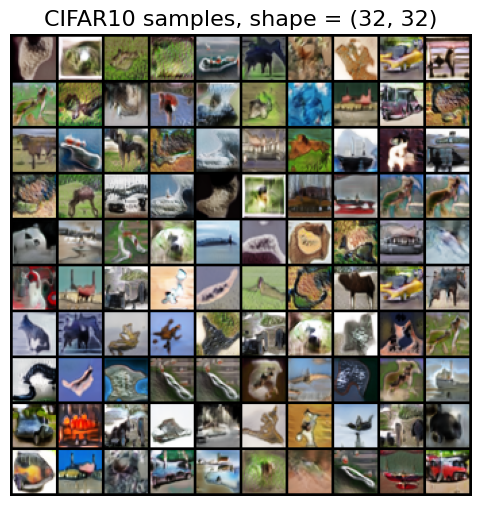

In [ ]:
batch = stylegan_r1.sample(100).detach().cpu().numpy()
show_samples(batch, "CIFAR10 samples, shape = ({0}, {0})".format(32), nrow=10)

Let's look at model samples from `stylegan_wgangp`.

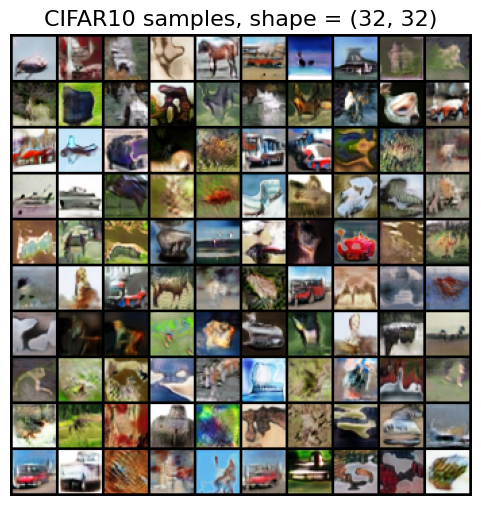

In [ ]:
batch = stylegan_wgangp.sample(100).detach().cpu().numpy()
show_samples(batch, "CIFAR10 samples, shape = ({0}, {0})".format(32), nrow=10)

###  Inception Score

The formula for Inception Score is
$$
    \text{IS} = \exp \bigl( \mathbb{E}_{\mathbf{x}} KL(p(y | \mathbf{x}) || p(y)) \bigr),
$$

where
* $p(y | \mathbf{x})$ is a pretrained classification model with labels $y$ (we will use [Inception V3 model](https://pytorch.org/vision/main/generated/torchvision.models.inception_v3.html));
* $p(y) = \int p(y | \mathbf{x}) p(\mathbf{x}) d \mathbf{x}$ is a marginal distribution on labels.

In order to calculate the **Inception** score we will use `InceptionV3` last layer activations (those before computing `Softmax`). The dimensionality of these activations is $1008$.

Let initialize our classification model.

In [ ]:
DIMS = 1008
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[DIMS]
inception_model_act5 = InceptionV3([block_idx])
if USE_CUDA:
    inception_model_act5 = inception_model_act5.cuda()
inception_model_act5.eval()

Downloading: "https://github.com/w86763777/pytorch-gan-metrics/releases/download/v0.1.0/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 365MB/s]


InceptionV3(
  (blocks): ModuleList(
    (0): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      

We need to get class probabilities from our classification model.

In [ ]:
def get_inception_probs(x: torch.Tensor, model: object) -> np.ndarray:
    with torch.no_grad():
        model.eval()
        logits = model(x)
        probs = F.softmax(logits, dim=1)

    return probs.data.cpu().numpy()


def test_get_inception_probs():
    x = torch.zeros(size=(1, 3, 10, 10))
    if USE_CUDA:
        x = x.cuda()
    probs = get_inception_probs(x, inception_model_act5)
    true_probs = np.array(
        [
            0.00012616384,
            0.00031305864,
            0.00019984621,
            0.00024997862,
            0.00005619833,
            0.00010180601,
            0.00002303111,
            0.0001946776,
            0.0015921608,
            0.000064336535,
        ]
    )
    assert np.allclose(probs[0, :10], true_probs)


test_get_inception_probs()

In [ ]:
# this is a helper function that generates samples from the StyleGAN generator
def generate_fake_images_stylegan(
    sg_generator: object, n_samples: int, batch_size: int
) -> np.ndarray:
    fake_images = []
    for i in range(n_samples // batch_size):
        fake_samples = sg_generator.sample(batch_size).cpu().detach().numpy()
        fake_images.extend(fake_samples)

    fake_samples = sg_generator.sample(n_samples % batch_size).cpu().detach().numpy()
    fake_images.extend(fake_samples)
    return np.array(fake_images)

It is the main function for getting Inception Score.

In [ ]:
from scipy.stats import entropy


def get_inception_score(
    generator: object,
    inception_model: object,
    n_samples: int,
    batch_size: int = 32,
    splits: int = 10,
) -> np.ndarray:
    if USE_CUDA:
        generator = generator.cuda()
        inception_model = inception_model.cuda()

    generator.eval()
    inception_model.eval()

    fake_images = generate_fake_images_stylegan(generator, n_samples, batch_size)
    loader = torch.utils.data.DataLoader(fake_images, batch_size=batch_size)

    probs_list = []

    for batch in loader:
        if USE_CUDA:
            batch = batch.cuda()

        with torch.no_grad():
            probs_list.append(get_inception_probs(batch, inception_model))

    probs = np.concatenate(probs_list, axis=0)
    split_scores = []

    for k in range(splits):
        part = probs[k * (n_samples // splits) : (k + 1) * (n_samples // splits), :]
        p_y = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, p_y))

        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores)

In [ ]:
N_SAMPLES = 1000
BATCH_SIZE = 16
SPLITS = 5

reset_seed()

IS_stylegan_r1 = get_inception_score(
    generator=stylegan_r1,
    inception_model=inception_model_act5,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
    splits=SPLITS,
)

reset_seed()

IS_stylegan_wgangp = get_inception_score(
    generator=stylegan_wgangp,
    inception_model=inception_model_act5,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
    splits=SPLITS,
)

In [ ]:
assert np.allclose(IS_stylegan_r1, 6.566, atol=0.1)
assert np.allclose(IS_stylegan_wgangp, 6.63, atol=0.1)

**In case you have free time**: You are free to evaluate the models from the previous homework via Inception-score.

In [ ]:
# Inception scores of your nice models which beat StyleGAN
...

###  Frechet Inception Distance

Now we will implement Frechet Inception Distance:

$$
	\text{FID} (\pi, p) = \| \mathbf{m}_{\pi} - \mathbf{m}_{p}\|_2^2 + \text{Tr} \left( \boldsymbol{\Sigma}_{\pi} + \boldsymbol{\Sigma}_p - 2 \sqrt{\boldsymbol{\Sigma}_{\pi} \boldsymbol{\Sigma}_p} \right)
$$

* Representations are the outputs of the intermediate layer from the pretrained classification model (we will use the activations of the last by one layer of `InceptionV3` (which have dimensionality $(2048, 1, 1)$), that's why the last two dimensions should be dropped before FID statistics calculation).
* $\mathbf{m}_{\pi}$, $\boldsymbol{\Sigma}_{\pi} $ are the mean vector and the covariance matrix of feature representations for samples from $\pi(\mathbf{x})$
* $\mathbf{m}_{p}$, $\boldsymbol{\Sigma}_p$ are the mean vector and the covariance matrix of feature representations for samples from $p(\mathbf{x} | \boldsymbol{\theta})$.

Let initialize our classification model which outputs last by one activations:

In [ ]:
DIMS = 2048
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[DIMS]
inception_model_act4 = InceptionV3([block_idx])
if USE_CUDA:
    inception_model_act4 = inception_model_act4.cuda()
inception_model_act4.eval()

InceptionV3(
  (blocks): ModuleList(
    (0): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      

Here we need samples from the ground truth distribution $\pi(\mathbf{x})$ (CIFAR10 images).

Files already downloaded and verified
Files already downloaded and verified


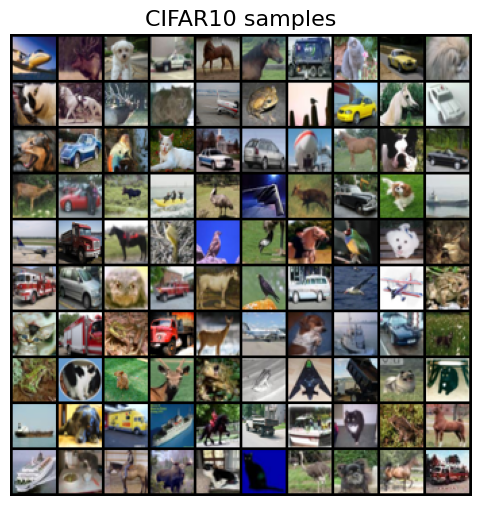

In [ ]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

Let implement function to take square root of matrix (we need it for the formula above).

In [ ]:
# this is a helper function, do not change
def get_matrix_sqrt(x: torch.Tensor) -> torch.Tensor:
    y = x.cpu().detach().numpy()
    y = scipy.linalg.sqrtm(y)
    if not np.isfinite(y).all():
        print("bad!")
    return torch.Tensor(y.real, device=x.device)

Not let implement the function to calculate the distance (it is just the formula above).

In [ ]:
def get_distance(
    mu_x: torch.Tensor, mu_y: torch.Tensor, sigma_x: torch.Tensor, sigma_y: torch.Tensor
) -> torch.Tensor:
    mean_distance = torch.sum((mu_x - mu_y) ** 2)
    cov_sqrt = get_matrix_sqrt(sigma_x @ sigma_y)
    sigma_distance = torch.trace(sigma_x + sigma_y - 2 * cov_sqrt)

    fid = mean_distance + sigma_distance
    return fid


def test_get_distance():
    mu_x = torch.ones(3)
    mu_y = torch.ones(3) * 10
    sigma_x = torch.eye(3) * 5
    sigma_y = torch.eye(3) * 3
    dist = get_distance(mu_x, mu_y, sigma_x, sigma_y)
    assert np.isclose(dist, 243.7621)


test_get_distance()

Let implement the function which calculate intermediate representations for real and fake samples.

In [ ]:
def get_features(
    generator: object,
    inception_model: object,
    loader: object,
    n_samples: int,
    batch_size: int,
) -> tuple:
    if USE_CUDA:
        generator = generator.cuda()
        inception_model.cuda()

    generator.eval()
    inception_model.eval()

    fake_features_list = []
    real_features_list = []
    cur_samples = 0

    with torch.no_grad():
        for real_samples in loader:
            # real_samples = resize_tensor(real_samples, image_size)
            if USE_CUDA:
                real_samples = real_samples.cuda()
            # ====
            # get features of real samples
            # drow the w and h dimensions of the obtained features

            # ====
            real_features = inception_model(real_samples).detach().squeeze()
            real_features_list.append(real_features)

            fake_samples = generator.sample(len(real_samples), step=3)
            # fake_samples = resize_tensor(fake_samples, image_size)
            if USE_CUDA:
                fake_samples = fake_samples.cuda()
            # ====
            # get features of fake samples
            # drop the w and h dimensions of the the obtained features

            # ====
            fake_features = inception_model(fake_samples).detach().squeeze()
            fake_features_list.append(fake_features)

            cur_samples += len(real_samples)
            if cur_samples >= n_samples:
                break

    fake_features_all = torch.cat(fake_features_list)
    real_features_all = torch.cat(real_features_list)
    return fake_features_all, real_features_all

In [ ]:
# this is a helper function, do not change
def calculate_stats(fake_features: torch.Tensor, real_features: torch.Tensor) -> tuple:
    def get_covariance(features):
        return torch.Tensor(np.cov(features.cpu().detach().numpy(), rowvar=False))

    mu_fake = fake_features.mean(0)
    mu_real = real_features.mean(0)
    sigma_fake = get_covariance(fake_features)
    sigma_real = get_covariance(real_features)
    return mu_fake, mu_real, sigma_fake, sigma_real

Now we are ready to implement the main function for getting FID.

In [ ]:
def get_frechet_inception_distance(
    generator: object,
    inception_model: object,
    loader: object,
    n_samples: int,
    batch_size: int,
) -> torch.Tensor:
    # ====
    # 1) get features
    # 2) calculate stats
    # 3) get distance

    # ====
    fake_features, real_features = get_features(
        generator,
        inception_model,
        loader,
        n_samples,
        batch_size,
    )
    mu_fake, mu_real, sigma_fake, sigma_real = calculate_stats(fake_features, real_features)
    fid = get_distance(mu_fake, mu_real, sigma_fake, sigma_real)
    return fid

In [ ]:
N_SAMPLES = 10000  # number of samples in the cifar10 test dataset
BATCH_SIZE = 16  # samples per iteration

gt_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

reset_seed()

FID_r1 = get_frechet_inception_distance(
    generator=stylegan_r1,
    inception_model=inception_model_act4,
    loader=gt_loader,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
)

reset_seed()

FID_wgangp = get_frechet_inception_distance(
    generator=stylegan_wgangp,
    inception_model=inception_model_act4,
    loader=gt_loader,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
)

In [ ]:
assert np.allclose(FID_r1.cpu().numpy(), 48.35, atol=0.2)
assert np.allclose(FID_wgangp.cpu().numpy(), 48.4, atol=0.2)

**In case you have free time**: You are free to evaluate the models from the previous homework via FID-score.

In [ ]:
# FID scores of your nice models which beat StyleGAN
...